# E-commerce Product Recommendation System
## Problem Statement
Working on building a recommendation engine for an e-commerce platform. Utilizing customer behavior data and machine learning techniques,designing a system capable of suggesting personalized product recommendations to users, enhancing their shopping experience and increasing sales.
#### Aim: 


In this project, we will build a recommendation engine for an e-commerce platform. Using customer behavior data and machine learning techniques, we'll design a system capable of suggesting personalized product recommendations to users, enhancing their shopping experience and increasing sales.

## Steps Involved

### 1. Importing Libraries
We start by importing the necessary libraries for data manipulation and similarity computation.

```python
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder


In [7]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

### 2. Loading the Dataset

The dataset (`amazonreview.csv`) containing product reviews and related information is loaded.

In [9]:
# Load your dataset
df = pd.read_csv('amazonreview.csv')

### 3. Data Preprocessing

Data preprocessing is crucial to ensure the dataset is clean and suitable for building the recommendation system.

#### Convert Relevant Columns to Numeric Types

Certain columns, such as `rating` and `rating_count`, which are typically represented as strings or objects, are converted to numeric types (`float` or `int`). This conversion facilitates mathematical operations and computations required for recommendation algorithms.


In [11]:
numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

### 4. Missing Value Treatment

In [13]:
for i in numeric_cols:
    df[i].fillna(df[i].mean(),inplace = True)

In [14]:
df.isnull().sum()

product_id                0
product_name              0
category                  0
discounted_price       1465
actual_price           1465
discount_percentage    1465
rating                    0
rating_count              0
about_product             0
user_id                   0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
dtype: int64

In [15]:
missing = df.isnull().sum()
missing_p = missing/ df.shape[0]* 100
print(missing_p)

product_id               0.0
product_name             0.0
category                 0.0
discounted_price       100.0
actual_price           100.0
discount_percentage    100.0
rating                   0.0
rating_count             0.0
about_product            0.0
user_id                  0.0
user_name                0.0
review_id                0.0
review_title             0.0
review_content           0.0
img_link                 0.0
product_link             0.0
dtype: float64


In [16]:
columns_to_drop = []
for column, percentage in missing_p.items():
    if percentage == 100:
        columns_to_drop.append(column)

df1 = df.drop(columns = columns_to_drop)

In [17]:
df1.shape

(1465, 13)

In [18]:
df = df1

In [19]:
df.shape

(1465, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1465 non-null   object 
 1   product_name    1465 non-null   object 
 2   category        1465 non-null   object 
 3   rating          1465 non-null   float64
 4   rating_count    1465 non-null   float64
 5   about_product   1465 non-null   object 
 6   user_id         1465 non-null   object 
 7   user_name       1465 non-null   object 
 8   review_id       1465 non-null   object 
 9   review_title    1465 non-null   object 
 10  review_content  1465 non-null   object 
 11  img_link        1465 non-null   object 
 12  product_link    1465 non-null   object 
dtypes: float64(2), object(11)
memory usage: 148.9+ KB


In [29]:
cat_cols =  df.select_dtypes(include = "object").columns
print(cat_cols)

Index(['product_id', 'product_name', 'category', 'about_product', 'user_id',
       'user_name', 'review_id', 'review_title', 'review_content', 'img_link',
       'product_link'],
      dtype='object')


### 5. Data Encoding 
#### Label Encoding
Converting the categorical columns to numeric.

In [35]:
#Encoding 
encoder = LabelEncoder()
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i])

In [37]:
df.select_dtypes(include = "object").columns

Index([], dtype='object')

### 6. Creating the User-Item Matrix

In [40]:
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

In [42]:
user_item_matrix = user_item_matrix.fillna(0)

### 7. Calculating User Similarity

In [44]:
user_similarity = cosine_similarity(user_item_matrix)

### 8. Building the Recommendation Function

In [46]:
def recommend_products(user_id, num_recommendations=5):
    user_ratings = user_item_matrix.loc[user_id].values.reshape(1, -1)
    similarities = cosine_similarity(user_ratings, user_item_matrix.values)
    similar_users_indices = similarities.argsort()[0][-num_recommendations-1:-1]
    recommended_products = df.loc[df['user_id'].isin(similar_users_indices), 'product_name'].unique()
    return recommended_products

In [47]:
df.head()

,product_id,product_name,category,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,346,1158,10,4.2,348.217791,474,623,522,817,881,604,1118,1308
1,848,134,10,4.0,348.217791,279,88,207,1025,7,413,1248,157
2,819,1023,10,3.9,348.217791,1250,849,482,827,422,674,876,1160
3,643,1264,10,4.2,348.217791,1010,254,614,786,376,269,518,380
4,588,829,10,4.2,348.217791,1189,17,1139,114,44,120,1209,919


### 9. EDA-Exploratory Data Analysis

C:\Users\sindhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


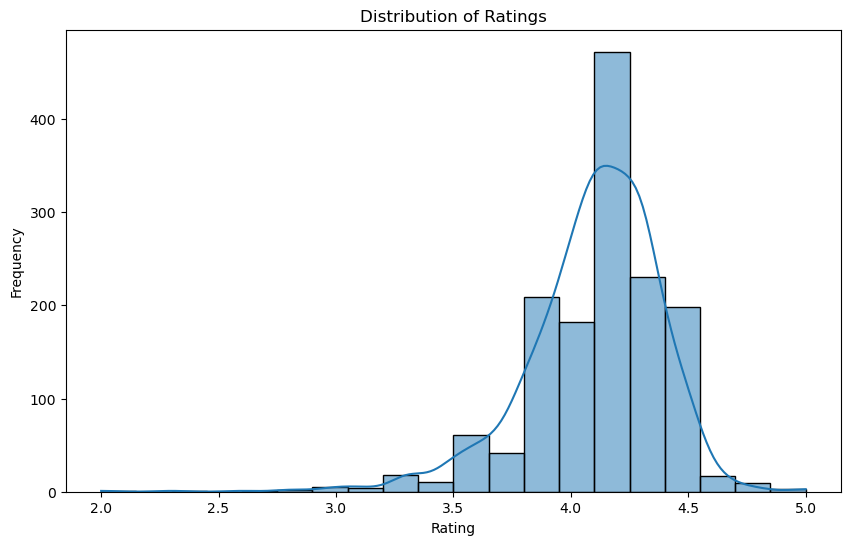

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\sindhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


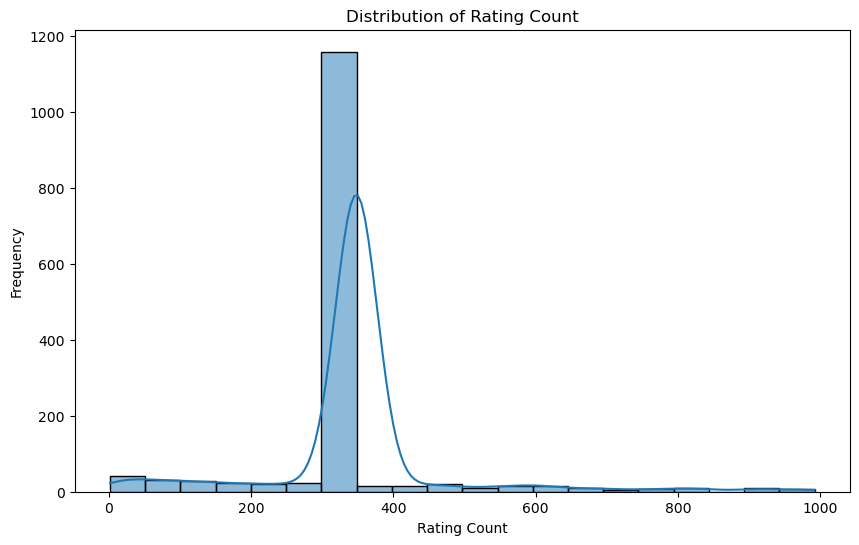

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_count'], bins=20, kde=True)
plt.title('Distribution of Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.show()

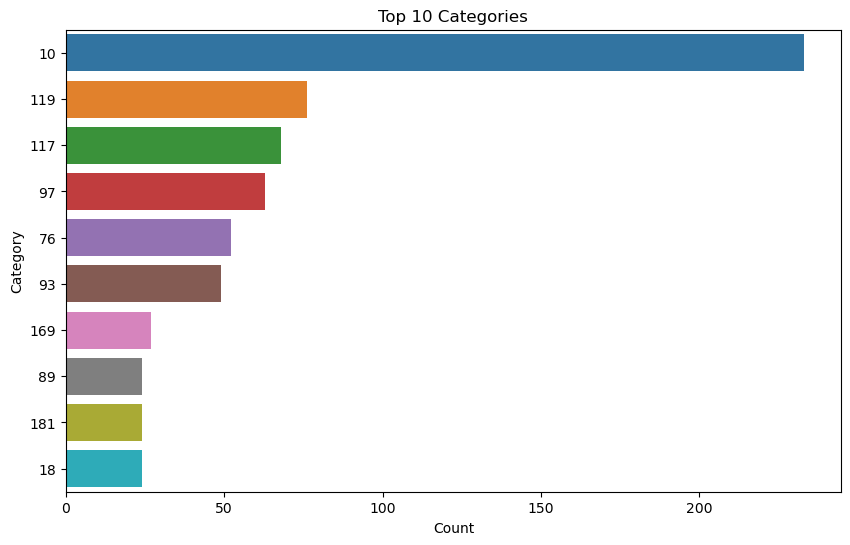

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().iloc[:10].index)
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

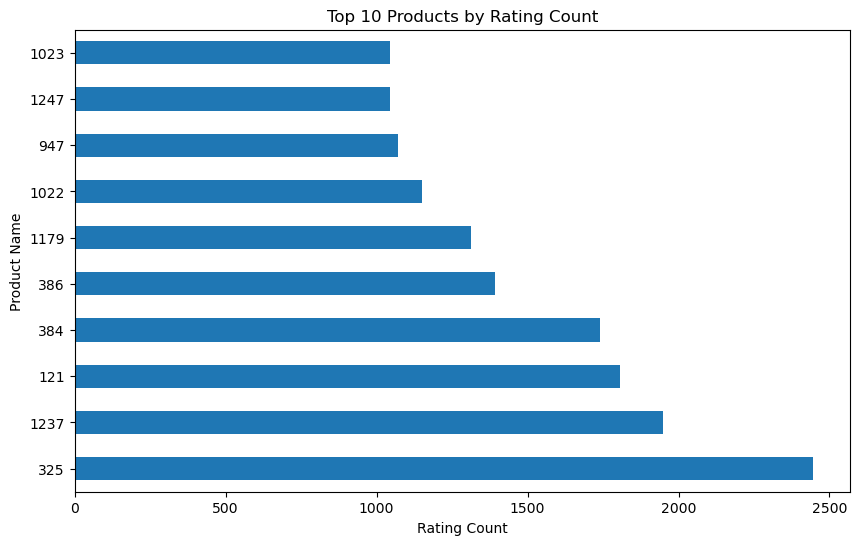

In [56]:
top_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh')
plt.title('Top 10 Products by Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Product Name')
plt.show()

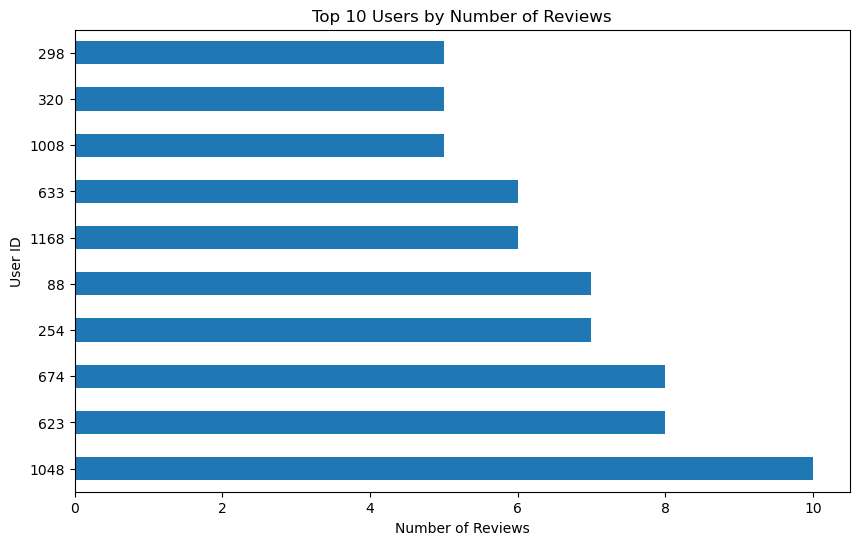

In [57]:
# Top 10 users by number of reviews
top_users = df['user_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_users.plot(kind='barh')
plt.title('Top 10 Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')
plt.show()

#### Correlation Matrix

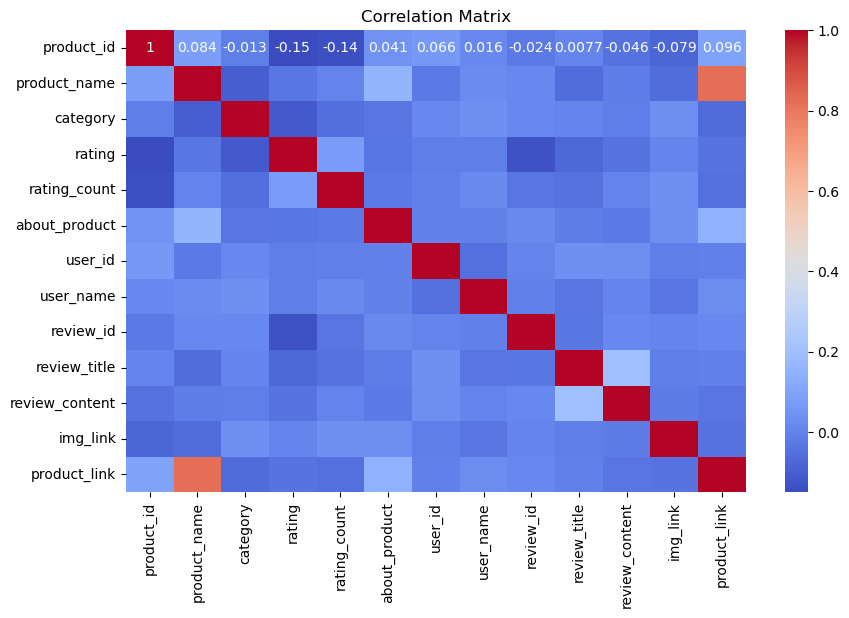

In [59]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [60]:
df['user_id'].value_counts()

user_id
1048    10
623      8
674      8
254      7
88       7
        ..
429      1
506      1
11       1
900      1
433      1
Name: count, Length: 1194, dtype: int64

In [61]:
user_ids_to_recommend = [10, 8, 7, 1]

### 10. Generating and Printing Recommendations

In [64]:
for user_id in user_ids_to_recommend:
    recommended_products = recommend_products(user_id)
    print(f"User {user_id} Recommended Products:")
    for product in recommended_products:
        print(product)
    print()  

User 10 Recommended Products:
831
983
657
1207
566

User 8 Recommended Products:
831
1027
1207
1194
566

User 7 Recommended Products:
831
657
1207
1194
566

User 1 Recommended Products:
831
657
1207
1194
566



### 11. Storing Recommendations

In [67]:
recommendations = []

for user_id in user_ids_to_recommend:
    recommended_products = recommend_products(user_id)
    for product in recommended_products:
        recommendations.append({'user_id': user_id, 'recommended_product': product})

In [69]:
recommendations_df = pd.DataFrame(recommendations)

In [71]:
recommendations_df.to_csv('user_recommendations.csv', index=False)

In [80]:
print("Final Recommendations:")
for user_id in user_ids_to_recommend:
    user_recommendations = recommendations_df[recommendations_df['user_id'] == user_id]['recommended_product'].tolist()
    print(f"User {user_id} Recommended Products:")
    for product in user_recommendations:
        print(product)
    print()

Final Recommendations:
User 10 Recommended Products:
831
983
657
1207
566

User 8 Recommended Products:
831
1027
1207
1194
566

User 7 Recommended Products:
831
657
1207
1194
566

User 1 Recommended Products:
831
657
1207
1194
566

